In [23]:
#load dataset
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1000
ages = np.random.randint(18, 65, size=n)
incomes = np.random.normal(50000, 15000, size=n).astype(int)
prices = np.random.uniform(10, 100, size=n).round(2)

def get_segment(income):
    if income < 40000:
        return "Price-Sensitive"
    elif income > 70000:
        return "Premium"
    return "Average"

segments = [get_segment(i) for i in incomes]

def purchase_prob(price, segment):
    base = 1 - (price / 120)
    if segment == "Price-Sensitive":
        return base - 0.2
    elif segment == "Premium":
        return base + 0.1
    return base

probs = [purchase_prob(p, s) for p, s in zip(prices, segments)]
purchased = np.random.binomial(1, np.clip(probs, 0, 1))

df = pd.DataFrame({
    "CustomerID": range(1, n + 1),
    "Age": ages,
    "Income": incomes,
    "Segment": segments,
    "Price_Offered": prices,
    "Purchased": purchased
})


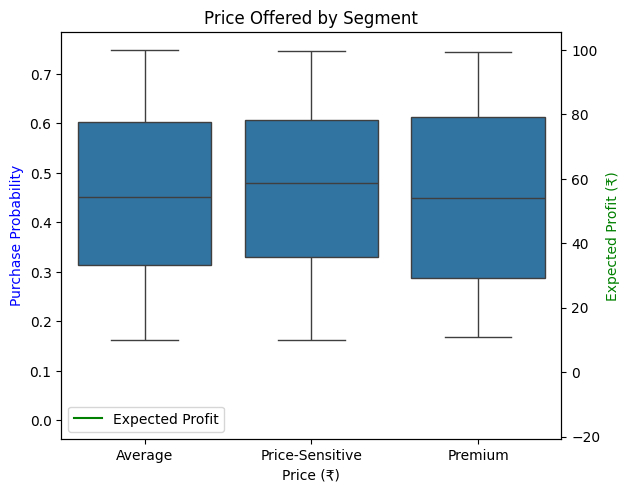

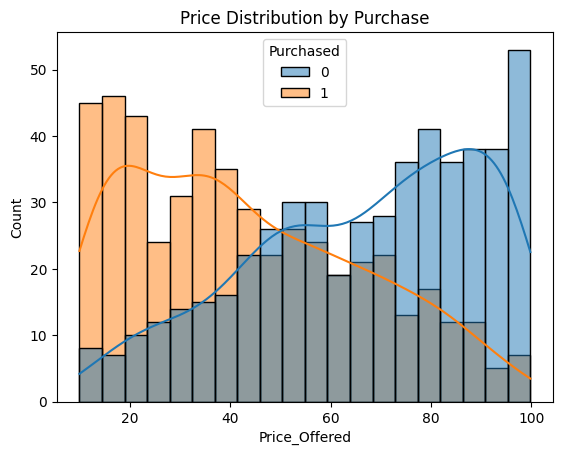

In [24]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


sns.boxplot(x="Segment", y="Price_Offered", data=df)
plt.title("Price Offered by Segment")
plt.show()

sns.histplot(data=df, x="Price_Offered", hue="Purchased", bins=20, kde=True)
plt.title("Price Distribution by Purchase")
plt.show()


In [25]:
from sklearn.preprocessing import LabelEncoder

df['Segment_Code'] = LabelEncoder().fit_transform(df['Segment'])


In [26]:
from sklearn.linear_model import LogisticRegression

X = df[['Price_Offered', 'Segment_Code']]
y = df['Purchased']

model = LogisticRegression()
model.fit(X, y)


LogisticRegression()

In [27]:
coeffs = pd.DataFrame({
    "Feature": ['Intercept'] + X.columns.tolist(),
    "Coefficient": [model.intercept_[0]] + model.coef_[0].tolist()
})
print(coeffs)


         Feature  Coefficient
0      Intercept     2.419640
1  Price_Offered    -0.040633
2   Segment_Code    -0.390113


In [28]:
price_range = np.linspace(10, 100, 100)
segment_mode = df['Segment_Code'].mode()[0]
cost = 30

# Predict purchase probability for average segment
X_sim = pd.DataFrame({
    'Price_Offered': price_range,
    'Segment_Code': [segment_mode] * len(price_range)
})
purchase_probs = model.predict_proba(X_sim)[:, 1]
profits = (price_range - cost) * purchase_probs

# Optimal price
opt_index = np.argmax(profits)
optimal_price = price_range[opt_index]
max_profit = profits[opt_index]

print(f"Optimal Price: ₹{optimal_price:.2f}")
print(f"Maximum Expected Profit per Unit: ₹{max_profit:.2f}")


Optimal Price: ₹70.00
Maximum Expected Profit per Unit: ₹15.82


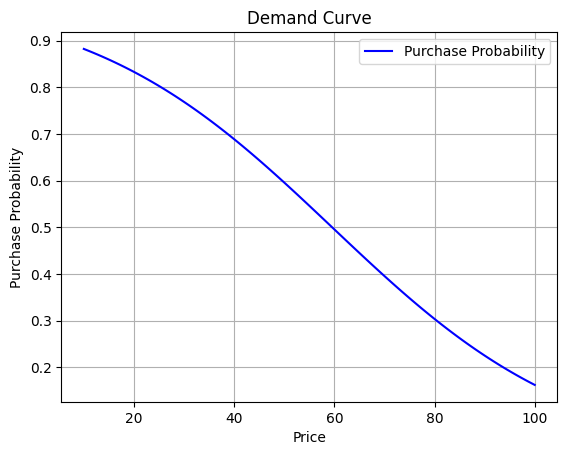

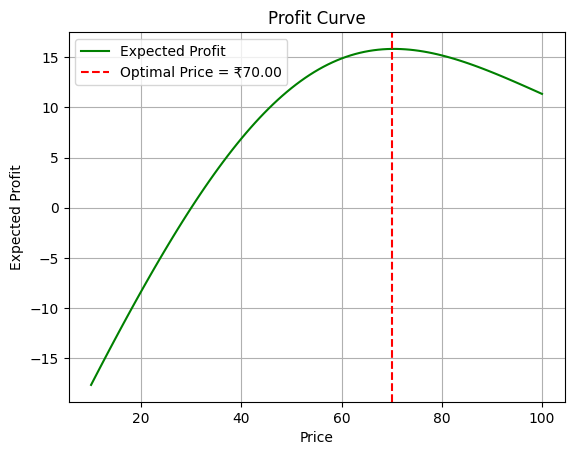

In [29]:
plt.plot(price_range, purchase_probs, label="Purchase Probability", color="blue")
plt.xlabel("Price")
plt.ylabel("Purchase Probability")
plt.title("Demand Curve")
plt.grid(True)
plt.legend()
plt.show()

plt.plot(price_range, profits, label="Expected Profit", color="green")
plt.axvline(optimal_price, color="red", linestyle="--", label=f"Optimal Price = ₹{optimal_price:.2f}")
plt.xlabel("Price")
plt.ylabel("Expected Profit")
plt.title("Profit Curve")
plt.legend()
plt.grid(True)
plt.show()


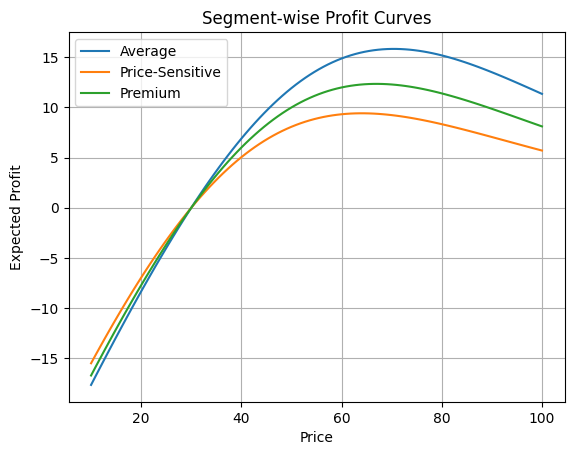

In [30]:
for seg in df['Segment'].unique():
    code = df[df['Segment'] == seg]['Segment_Code'].iloc[0]
    X_seg = pd.DataFrame({'Price_Offered': price_range, 'Segment_Code': [code]*len(price_range)})
    seg_probs = model.predict_proba(X_seg)[:, 1]
    seg_profit = (price_range - cost) * seg_probs
    plt.plot(price_range, seg_profit, label=seg)

plt.title("Segment-wise Profit Curves")
plt.xlabel("Price")
plt.ylabel("Expected Profit")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\hp\appdata\local\programs\python\python311\lib\site-packages\pyke-1.1.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
